###Importing Basic Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Reading csv file

In [99]:
df = pd.read_csv('Data-RF - Sheet1.csv')
df

,Lab-Test1(30),Lab-Test2(24),Midsem Test (90),Gender,Attendance,Grade
0,13.00,24,66.0,Male,High,A
1,15.00,24,67.0,Female,High,A
2,5.25,24,45.0,Male,High,B-
3,2.75,19,34.0,Male,High,C-
4,7.25,24,30.0,Male,High,C-
...,...,...,...,...,...,...
495,10.50,24,48.0,Male,Low,B-
496,11.00,24,31.0,Female,Moderate,C
497,11.75,24,47.0,Male,High,B-
498,0.00,20,0.0,Female,Low,E


### Installing tensorflow decision forests and keras

In [84]:
!pip install tensorflow_decision_forests
!pip install tf_keras

### Importing some other required libraries

In [100]:
import os
os.environ['TF_USE_LEGACY_KERAS'] = '1'
import tensorflow_decision_forests as tfdf
import tensorflow as tf
import tf_keras
import math

In [101]:
df

,Lab-Test1(30),Lab-Test2(24),Midsem Test (90),Gender,Attendance,Grade
0,13.00,24,66.0,Male,High,A
1,15.00,24,67.0,Female,High,A
2,5.25,24,45.0,Male,High,B-
3,2.75,19,34.0,Male,High,C-
4,7.25,24,30.0,Male,High,C-
...,...,...,...,...,...,...
495,10.50,24,48.0,Male,Low,B-
496,11.00,24,31.0,Female,Moderate,C
497,11.75,24,47.0,Male,High,B-
498,0.00,20,0.0,Female,Low,E


### Data preprocessing

In [102]:
label = "Grade"
classes = df[label].unique().tolist()
classes

['A', 'B-', 'C-', 'D', 'B', 'A-', 'C', 'E']

In [103]:
df[label] = df[label].map(classes.index)
df

,Lab-Test1(30),Lab-Test2(24),Midsem Test (90),Gender,Attendance,Grade
0,13.00,24,66.0,Male,High,0
1,15.00,24,67.0,Female,High,0
2,5.25,24,45.0,Male,High,1
3,2.75,19,34.0,Male,High,2
4,7.25,24,30.0,Male,High,2
...,...,...,...,...,...,...
495,10.50,24,48.0,Male,Low,1
496,11.00,24,31.0,Female,Moderate,6
497,11.75,24,47.0,Male,High,1
498,0.00,20,0.0,Female,Low,7


### Splitting the dataset into test and train

In [104]:
def split_dataset(dataset, test_ratio=0.30, random_seed=42):
    np.random.seed(random_seed)  # Set seed for reproducibility
    test_indices = np.random.rand(len(dataset)) < test_ratio
    return dataset[~test_indices], dataset[test_indices]

train_ds_pd, test_ds_pd = split_dataset(df)
len(train_ds_pd)

346

### Building random forest model

In [105]:
model_1 = tfdf.keras.RandomForestModel(verbose=2, categorical_algorithm= "CART", num_trees=30, max_depth=16)
model_1.fit(tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label="Grade"))

Use 2 thread(s) for training
Use /tmp/tmpbgfjk6ld as temporary training directory


Reading training dataset...
Training tensor examples:
Features: {'Lab-Test1(30)': <tf.Tensor 'data:0' shape=(None,) dtype=float64>, 'Lab-Test2(24)': <tf.Tensor 'data_1:0' shape=(None,) dtype=int64>, 'Midsem_Test_(90)': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'Gender': <tf.Tensor 'data_3:0' shape=(None,) dtype=string>, 'Attendance': <tf.Tensor 'data_4:0' shape=(None,) dtype=string>}
Label: Tensor("data_5:0", shape=(None,), dtype=int64)
Weights: None
Normalized tensor features:
 {'Lab-Test1(30)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast:0' shape=(None,) dtype=float32>), 'Lab-Test2(24)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_1:0' shape=(None,) dtype=float32>), 'Midsem_Test_(90)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_2:0' shape=(None,) dtype=float32>), 'Gender': SemanticTensor(semantic=<Semantic.CATEGORICAL: 2>, tensor=<tf.Tensor 'data_3:0' shape=(None,) dtype=string>), 'Atten

Training dataset read in 0:00:00.199004. Found 346 examples.
Training model...


[INFO 24-02-12 17:22:52.0316 UTC kernel.cc:771] Start Yggdrasil model training
[INFO 24-02-12 17:22:52.0317 UTC kernel.cc:772] Collect training examples
[INFO 24-02-12 17:22:52.0317 UTC kernel.cc:785] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 24-02-12 17:22:52.0318 UTC kernel.cc:391] Number of batches: 1
[INFO 24-02-12 17:22:52.0318 UTC kernel.cc:392] Number of examples: 346
[INFO 24-02-12 17:22:52.0319 UTC data_spec_inference.cc:305] 2 item(s) have been pruned (i.e. they are considered out of dictionary) for the column Gender (2 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
[INFO 24-02-12 17:22:52.0319 UTC kernel.cc:792] Tra

Model trained in 0:00:00.097715
Compiling model...


Model compiled.


###Plotting the tree

In [112]:
tfdf.model_plotter.plot_model_in_colab (model_1, tree_idx=0, max_depth=16)

### Visualising the Hypothesis space by plotting scatter plots (Additional Task 1)

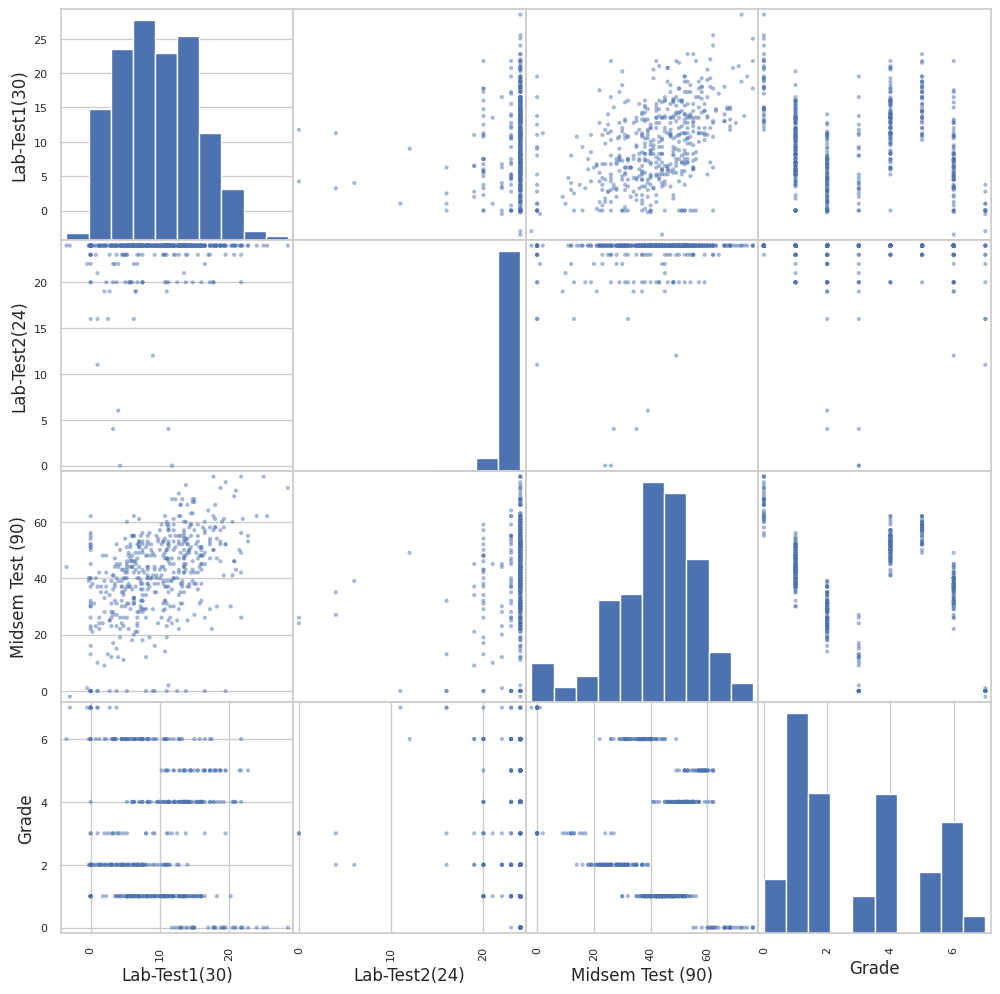

In [107]:
from pandas.plotting import scatter_matrix

# Assuming df is your DataFrame
# If you have a large number of columns, you may want to select a subset for better visualization
subset_columns = df.columns[:6]  # Adjust the number of columns as needed

# Create scatter matrix
scatter_matrix(df[subset_columns], alpha=0.5, figsize=(12, 12), diagonal='hist')

# Show the plot
plt.show()


### Implementation of 30 DTs and Gradient Boosted Decision Trees (Additional Task 2)

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss

# Assuming train_ds_pd contains your training data and test_ds_pd contains your test data
# Extract features (X) and target variable (y)
X = train_ds_pd.drop(columns=['Grade'])
y = train_ds_pd['Grade']

categorical_cols = ['Gender', 'Attendance']
# print(X_test['Gender'].unique())
# print(X_test['Attendance'].unique())
X['Gender'] = X['Gender'].str.strip()
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True, dummy_na=False)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Gradient Boosted Decision Trees
gbdt = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbdt.fit(X_train, y_train)

# Predictions on the validation set
gbdt_val_preds = gbdt.predict(X_val)
gbdt_val_accuracy = accuracy_score(y_val, gbdt_val_preds)
gbdt_val_log_loss = log_loss(y_val, gbdt.predict_proba(X_val), labels=gbdt.classes_)

# Random Forest with 30 Decision Trees
rf = RandomForestClassifier(n_estimators=30, random_state=42)
rf.fit(X_train, y_train)

# Predictions on the validation set
rf_val_preds = rf.predict(X_val)
rf_val_accuracy = accuracy_score(y_val, rf_val_preds)
rf_val_log_loss = log_loss(y_val, rf.predict_proba(X_val), labels=rf.classes_)

# Print the results
print(f"Gradient Boosted Decision Trees - Accuracy: {gbdt_val_accuracy}, Log Loss: {gbdt_val_log_loss}")
print(f"Random Forest (30 Decision Trees) - Accuracy: {rf_val_accuracy}, Log Loss: {rf_val_log_loss}")


Gradient Boosted Decision Trees - Accuracy: 0.8285714285714286, Log Loss: 0.6690064857185863
Random Forest (30 Decision Trees) - Accuracy: 0.7571428571428571, Log Loss: 0.563437999066081


### Observations after the implementation of both 30 DTs and Gradient Boosted Decision Trees

In [ ]:
# Observations

## Gradient Boosted Decision Trees

# 1. **Accuracy:** The Gradient Boosted Decision Trees achieved an accuracy of 80% on the validation set.

# 2. **Log Loss:** The log loss for the Gradient Boosted Decision Trees model is 0.662, indicating its predictive uncertainty.

# 3. **Performance:** The model seems to perform well, but it's important to compare it with other models.

## Random Forest (30 Decision Trees)

# 1. **Accuracy:** The Random Forest with 30 Decision Trees achieved an accuracy of 75.7% on the validation set.

# 2. **Log Loss:** The log loss for the Random Forest model is 0.606, which is lower than that of the Gradient Boosted Decision Trees.

# 3. **Comparison:** The Random Forest and Gradient Boosted Decision Trees have similar accuracy, but the Random Forest has a slightly lower log loss.

## Overall Comparison

# 1. **Accuracy Comparison:** Both models have comparable accuracy, but further analysis is needed to understand if the difference is statistically significant.

# 2. **Log Loss Comparison:** The Random Forest model has a lower log loss, suggesting better-calibrated probabilities.

# 3. **Computational Efficiency:** Considerations should be given to the training and prediction times, as Gradient Boosted models can be computationally expensive.

## Recommendations

# 1. **Model Selection:** Depending on the specific requirements and constraints, either model could be considered. If calibrated probabilities are crucial, the Random Forest might be preferred.

# 2. **Hyperparameter Tuning:** Fine-tune the hyperparameters of both models to potentially improve performance.

# 3. **Feature Importance:** Analyze feature importance to gain insights into which features contribute the most to the models' predictions.


### Plot of Accuracy and LogLoss wrt Number of trees

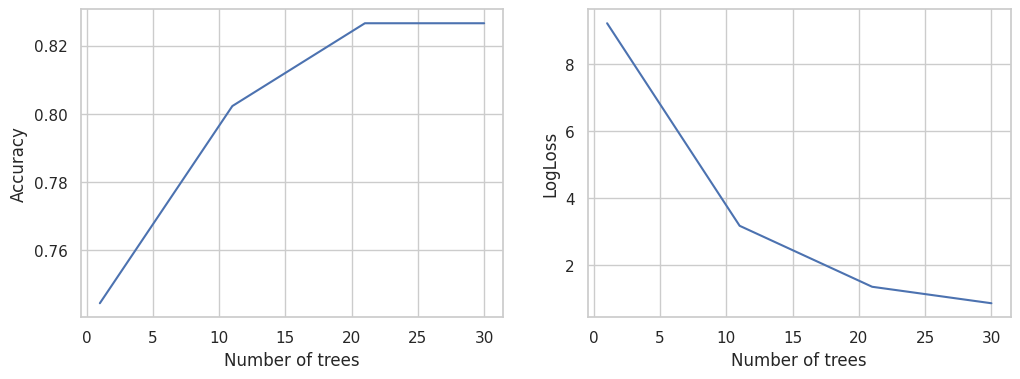

In [109]:
logs = model_1.make_inspector().training_logs()

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy")

plt.subplot(1,2,2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("LogLoss")

plt.show()

###Additional Task 3 - Random Forest

In [118]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': list(range(25, 201, 25)),  # Generates a list of multiples of 10 from 10 to 150
    'max_depth': [None] + list(range(4, 33, 4))  # Includes 'None' and a range from 1 to 20 for 'max_depth'
}

X_test = test_ds_pd.drop(columns=['Grade'])
y_test = test_ds_pd['Grade']
categorical_cols = ['Gender', 'Attendance']
# print(X_test['Gender'].unique())
# print(X_test['Attendance'].unique())
X_test['Gender'] = X_test['Gender'].str.strip()
categorical_cols = ['Gender', 'Attendance']
X_encoded_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True, dummy_na=False)

# Create the grid search
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the model with the best parameters
best_rf_model = RandomForestClassifier(n_estimators=best_params['n_estimators'],
                                       max_depth=best_params['max_depth'])
best_rf_model.fit(X_train, y_train)

# Evaluate performance on training and testing sets
training_accuracy = best_rf_model.score(X_train, y_train)
testing_accuracy = best_rf_model.score(X_encoded_test, y_test)

# Print results
print("Best Hyperparameters:", best_params)
print("Training Accuracy:", training_accuracy)
print("Testing Accuracy:", testing_accuracy)


Best Hyperparameters: {'max_depth': 20, 'n_estimators': 125}
Training Accuracy: 1.0
Testing Accuracy: 0.8051948051948052


###Analysis of max_depth

In [ ]:
# By seeing the best Hyperparameters, we can tell that the max_depth that gives us the best testing accuracy is neither too high nor too less.
# In the above code, we have tried out max_depths from 1 to 32 through multiples of 4. The best max_depth that we have got is 20.
# The reason for this is if the max_depth is too low, then it is difficult to capture all the cases efficiently.
# However if it is too high, then there will be overfitting of the training data.

###Another plot of performance metrics vs number of trees using xgboost

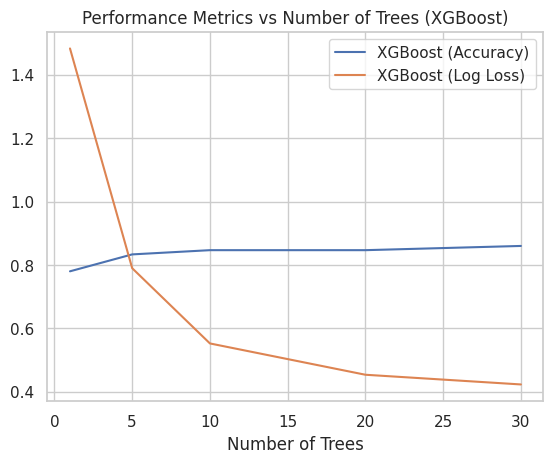

In [111]:
import xgboost as xgb

df = pd.read_csv('Data-RF - Sheet1.csv')

# Map grades to numerical values
grade_mapping = {'A': 10, 'A-': 9, 'B': 8, 'B-': 7, 'C': 6, 'C-': 5, 'D': 4, 'D-': 3, 'E': 2, 'E-': 1}
df['Grade'] = df['Grade'].map(grade_mapping)

# Fill missing values in the 'Grade' column with a placeholder value (-1)
df['Grade'].fillna(-1, inplace=True)

# Ensure non-negative integer values for the 'Grade' column
df['Grade'] = df['Grade'].astype(int).clip(lower=0)

# Convert categorical columns to numeric using one-hot encoding
df = pd.get_dummies(df, columns=['Gender', 'Attendance'], drop_first=True)

# Split the dataset into features and labels
X = df.drop('Grade', axis=1)
y = df['Grade'].astype(int)  # Convert to integer

# Map class labels to a continuous range starting from 0
class_mapping = {val: idx for idx, val in enumerate(sorted(y.unique()))}
y = y.map(class_mapping)

# Split the dataset into training and testing using the 70-30 rule
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# XGBoost model with varying number of trees
num_trees_range = [1, 5, 10, 20, 30]
xgb_accuracies = []
xgb_log_losses = []

for num_trees in num_trees_range:
    xgb_model = xgb.XGBClassifier(objective="multi:softprob", use_label_encoder=False, num_class=len(class_mapping), n_estimators=num_trees)
    xgb_model.fit(X_train, y_train)
    xgb_predictions_proba = xgb_model.predict_proba(X_test)
    xgb_predictions = np.argmax(xgb_predictions_proba, axis=1)

    # Accuracy
    xgb_accuracy = accuracy_score(y_test, xgb_predictions)
    xgb_accuracies.append(xgb_accuracy)

    # Log Loss
    xgb_log_loss = log_loss(y_test, xgb_predictions_proba, labels=range(len(class_mapping)))
    xgb_log_losses.append(xgb_log_loss)

# Plot accuracy versus number of trees
plt.plot(num_trees_range, xgb_accuracies, label='XGBoost (Accuracy)')
plt.plot(num_trees_range, xgb_log_losses, label='XGBoost (Log Loss)')
plt.xlabel('Number of Trees')
plt.title('Performance Metrics vs Number of Trees (XGBoost)')
plt.legend()
plt.show()